Churn Prediction Project

This project aims to predict customer churn for a telecommunications company using machine learning techniques. Churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company. Predicting churn can help companies identify at-risk customers and take proactive measures to retain them, thereby reducing revenue loss.

Approach:
1. Data Preparation: The dataset is cleaned, missing values are handled, and categorical variables are encoded.
2. Exploratory Data Analysis (EDA): Exploratory analysis is performed to gain insights into the data and identify patterns and relationships.
3. Feature Engineering: Existing features are transformed to improve model performance.
4. Model Building: Various machine learning models, such as logistic regression, decision trees, random forests, and gradient boosting, are trained and evaluated for their ability to predict churn.
5. Model Evaluation: The best performing model is evaluated

Importing libraries

In [351]:
import numpy as np
import pandas as pd

Importing dataset

In [352]:
churn=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [353]:
churn.shape

(7043, 21)

In [354]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [355]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [356]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As there are no null values we can proceed further

In [357]:
churn.Churn.value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

The data is in the imbalanced form as in the data only 27% of the customers are churned.We will handle this further in the upcoming process.

# data preparation

Replacing the no internet service with no for the required variables

In [358]:
churn['MultipleLines'] = churn['MultipleLines'].replace({'No phone service': 'No'})

In [359]:
churn['OnlineSecurity'] = churn['OnlineSecurity'].replace({'No internet service': 'No'})

In [360]:
churn['OnlineBackup'] = churn['OnlineBackup'].replace({'No internet service': 'No'})

In [361]:
churn['DeviceProtection'] = churn['DeviceProtection'].replace({'No internet service': 'No'})

In [362]:
churn['TechSupport'] = churn['TechSupport'].replace({'No internet service': 'No'})

In [363]:
churn['StreamingTV'] = churn['StreamingTV'].replace({'No internet service': 'No'})

In [364]:
churn['StreamingMovies'] = churn['StreamingMovies'].replace({'No internet service': 'No'})

As the total charges is in the object type we convert it into the float

In [365]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [366]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [367]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [368]:
churn.dropna(inplace=True)

In [369]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Handling Outliers

In [370]:
import matplotlib.pyplot as plt

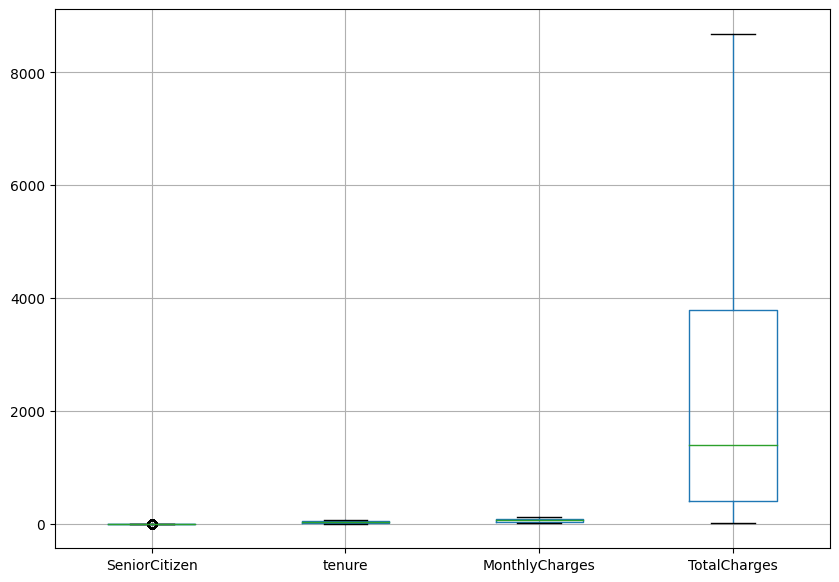

In [371]:
churn.boxplot(figsize=(10,7))
plt.show()

In [372]:
Q1 = churn['SeniorCitizen'].quantile(0.25)
Q3 = churn['SeniorCitizen'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

churn['SeniorCitizen'] = churn['SeniorCitizen'].clip(lower_bound, upper_bound)


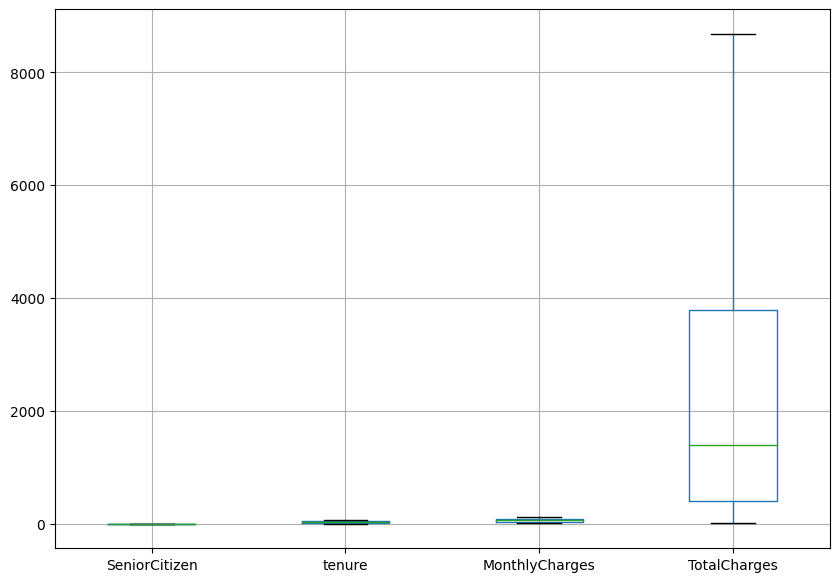

In [373]:
churn.boxplot(figsize=(10,7))
plt.show()

# exploratory data analysis


# univariate analysis

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution

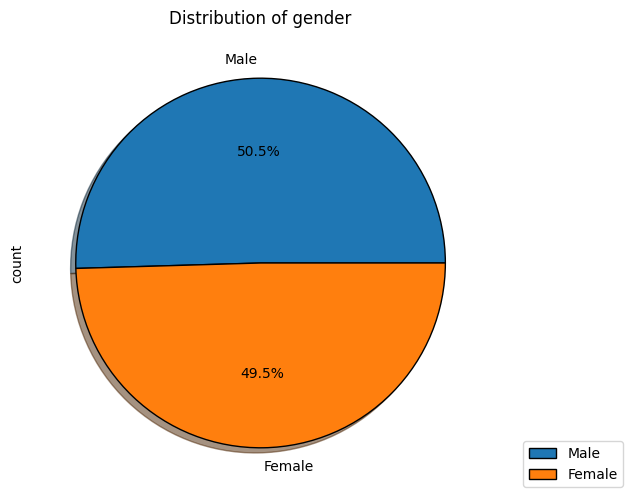

In [375]:
plt.figure(figsize=(6,6))
churn['gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,
                                     wedgeprops= {"edgecolor":"black",'linewidth': 1,'antialiased':True})
plt.title("Distribution of gender")
plt.legend(loc="lower right",bbox_to_anchor =(0.8, 0, 0.5, 1))
plt.show()

almost male and female ditribution is same in the datset

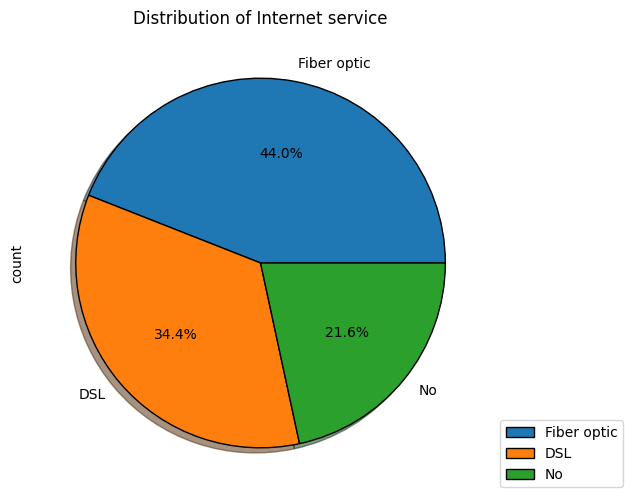

In [376]:
plt.figure(figsize=(6,6))
churn['InternetService'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,
                                     wedgeprops= {"edgecolor":"black",'linewidth': 1,'antialiased':True})
plt.title("Distribution of Internet service")
plt.legend(loc="lower right",bbox_to_anchor =(0.8, 0, 0.5, 1))
plt.show()

Among all the internet services most of the customers choose the fiber optics

<ipython-input-377-82ed3d3bd899>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=churn, x="PaymentMethod",palette="Set2")


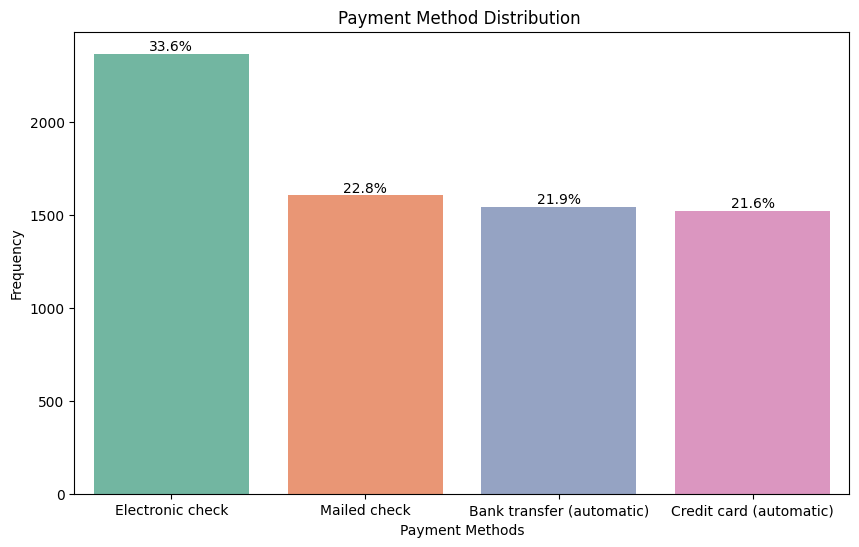

In [377]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=churn, x="PaymentMethod",palette="Set2")

total = len(churn)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.title("Payment Method Distribution ")
plt.xlabel("Payment Methods")
plt.ylabel("Frequency")
plt.show()

From the above distribution most of the customers choose for the 'electronic check' payment method

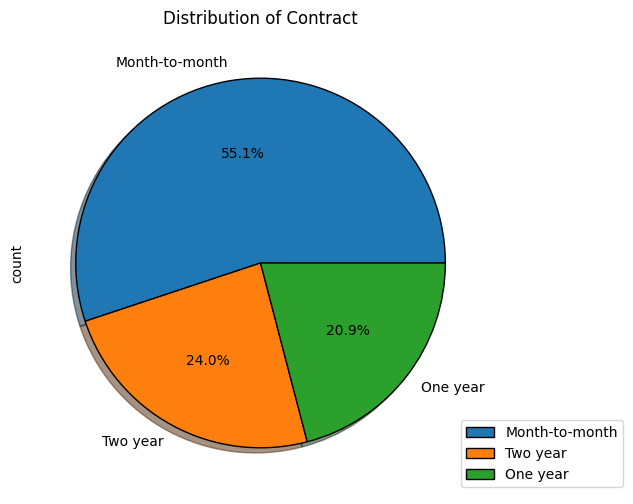

In [378]:
plt.figure(figsize=(6,6))
churn['Contract'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,
                                     wedgeprops= {"edgecolor":"black",'linewidth': 1,'antialiased':True})
plt.title("Distribution of Contract")
plt.legend(loc="lower right",bbox_to_anchor =(0.8, 0, 0.5, 1))
plt.show()

Almost 50% of the customers are likely to choose the month-to-month contracts rather than the one year and two year contracts

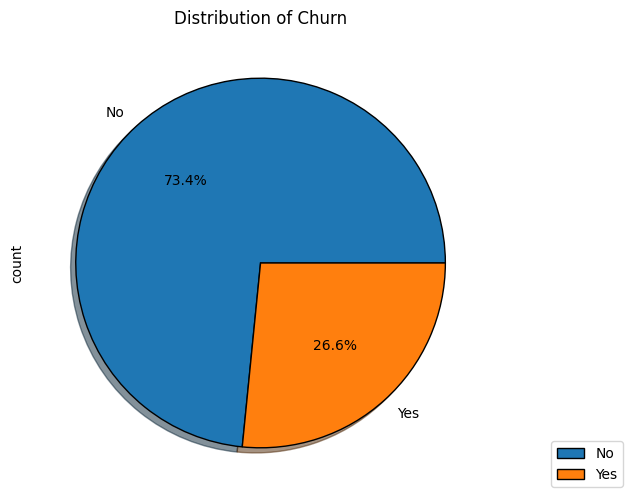

In [379]:
plt.figure(figsize=(6,6))
churn['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,
                                     wedgeprops= {"edgecolor":"black",'linewidth': 1,'antialiased':True})
plt.title("Distribution of Churn")
plt.legend(loc="lower right",bbox_to_anchor =(0.8, 0, 0.5, 1))
plt.show()

# Bivariate analysis

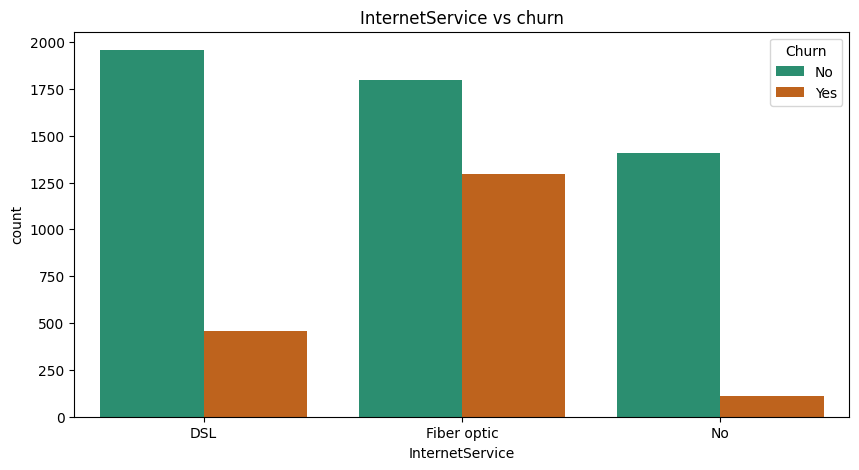

In [380]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='InternetService',hue ='Churn',data=churn,palette="Dark2")
plt.title("InternetService vs churn")
plt.show()

The internet service of fiber optic are more likely to be churned

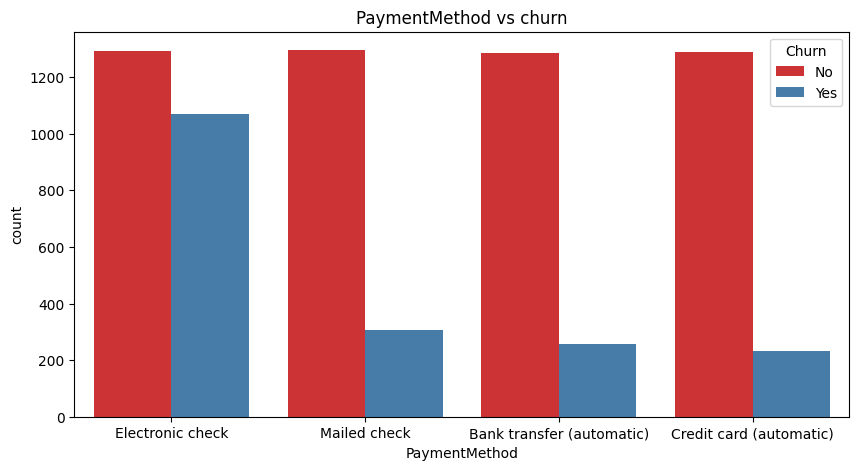

In [381]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod',hue ='Churn',data=churn,palette="Set1")
plt.title("PaymentMethod vs churn")
plt.show()

The payment method with electronic check are more likely to be churned

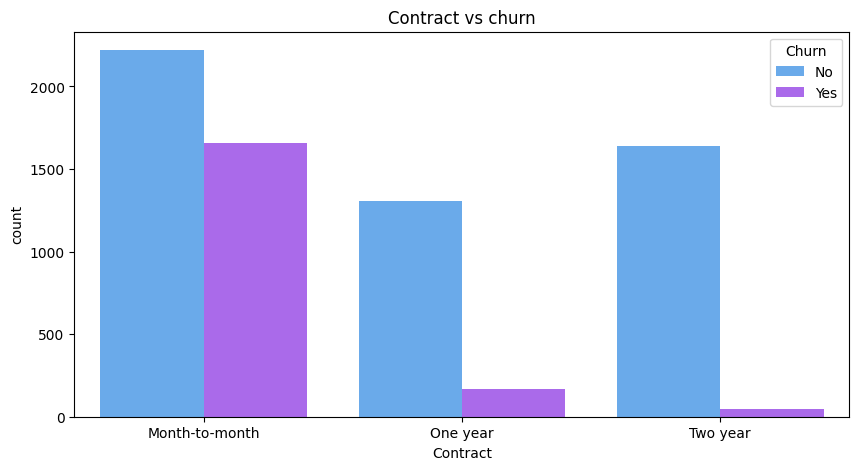

In [382]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Contract',hue ='Churn',data=churn,palette="cool")
plt.title("Contract vs churn")
plt.show()

The customers who are choosing monthly contract aremore likely to be churned

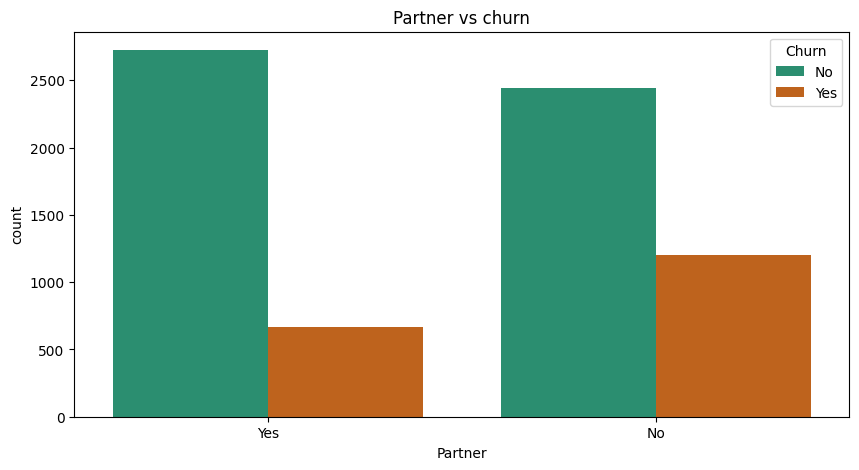

In [383]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Partner',hue ='Churn',data=churn,palette="Dark2")
plt.title("Partner vs churn")
plt.show()

Customers without partners are churning more in comparison to customers with partners

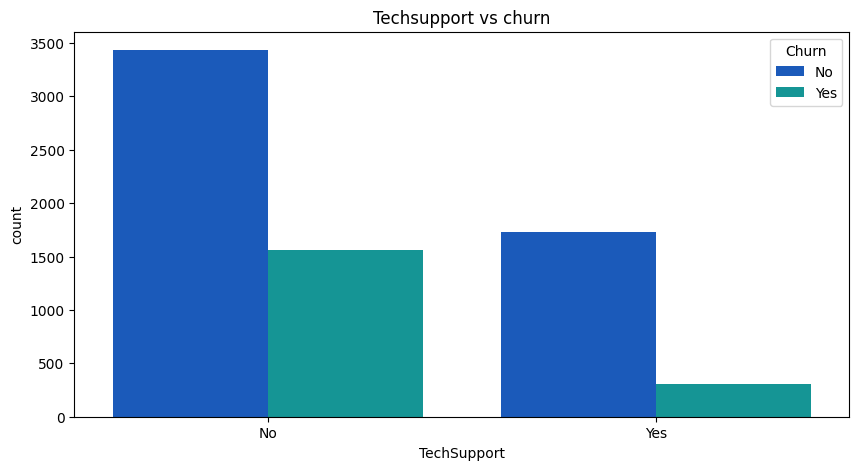

In [384]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='TechSupport',hue ='Churn',data=churn,palette="winter")
plt.title("Techsupport vs churn")
plt.show()

Customers with no tech support are churning more

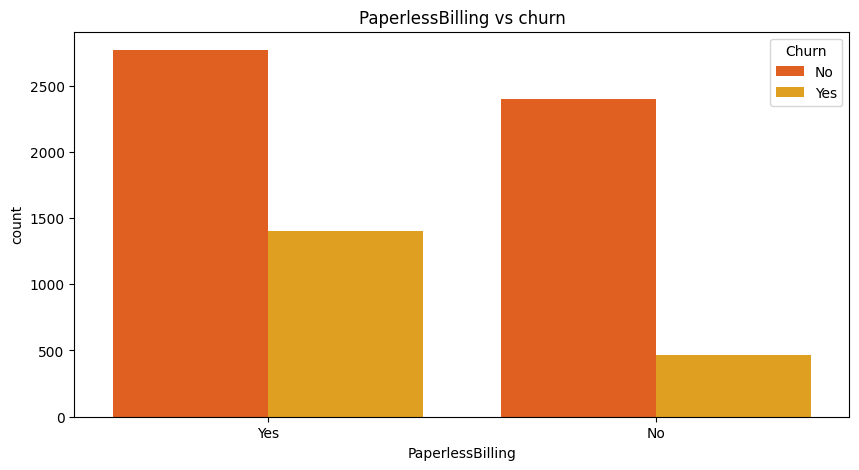

In [385]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='PaperlessBilling',hue ='Churn',data=churn,palette="autumn")
plt.title("PaperlessBilling vs churn")
plt.show()

Customers who use Paperless Billing are churning more in comparison to their counterparts

Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


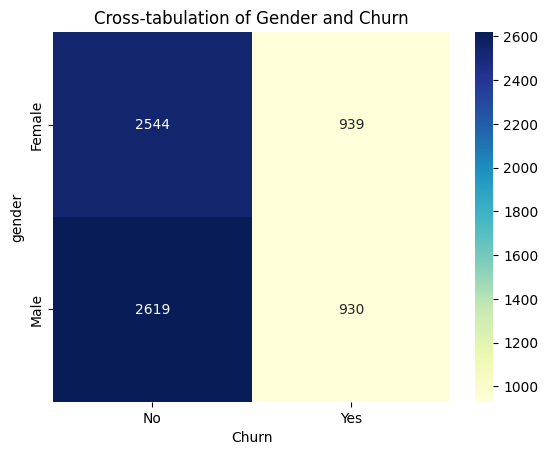

In [386]:
cross_tab = pd.crosstab(churn['gender'],churn['Churn'])
print(cross_tab)

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-tabulation of Gender and Churn')
plt.show()

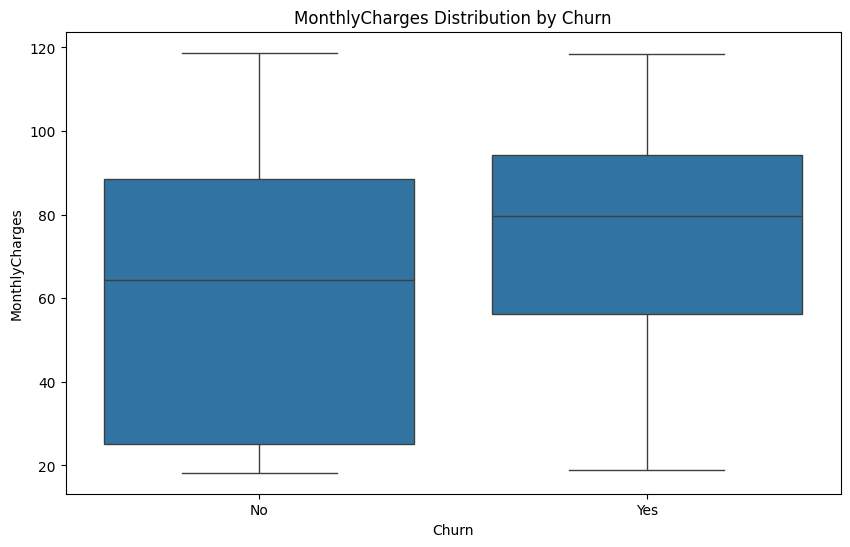

In [387]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=churn)
plt.title('MonthlyCharges Distribution by Churn')
plt.show()

The plot above shows that customers who churn have a higher median monthly charge.

# Multivariate analysis

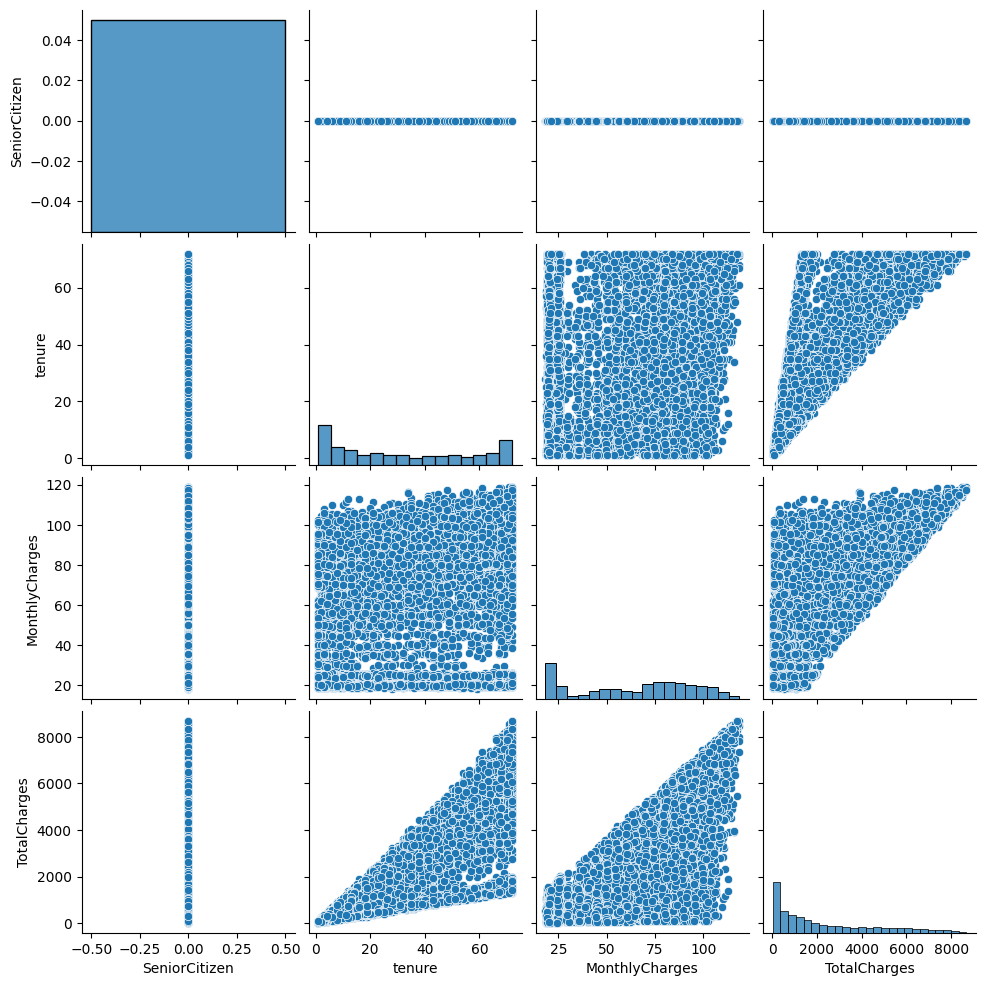

In [388]:
sns.pairplot(data=churn)
plt.show()

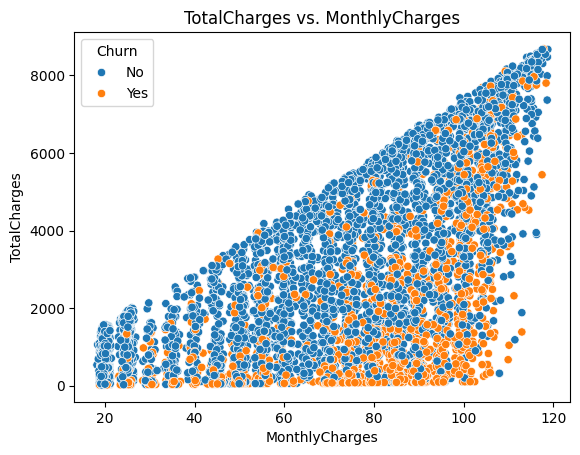

In [389]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=churn)
plt.title('TotalCharges vs. MonthlyCharges')
plt.show()


<Figure size 2000x500 with 0 Axes>

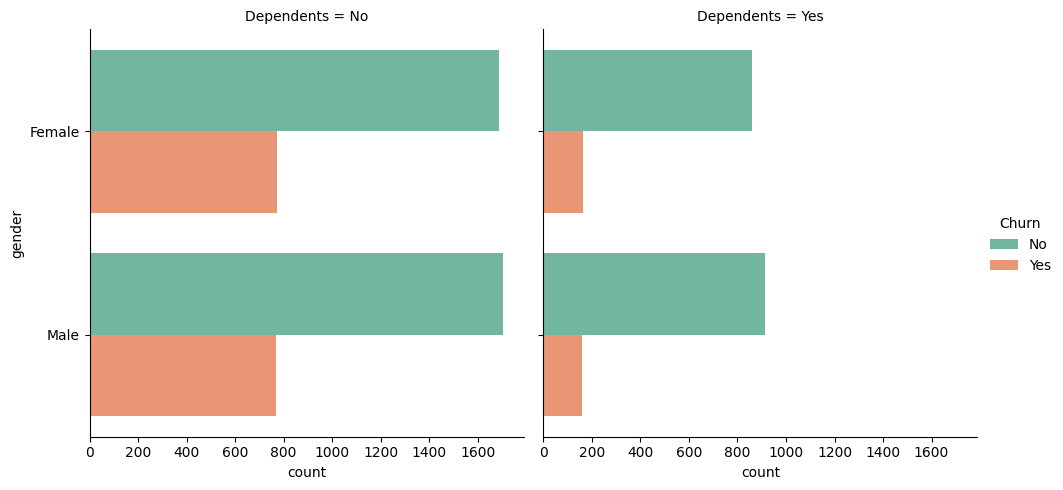

In [390]:
plt.figure(figsize=(20,5))
sns.catplot(y="gender", hue="Churn", kind="count",col="Dependents", data=churn,palette="Set2")
plt.show()

the customers who are independents are less likely to be churned

# Data preprocessing

# Label encoding

As the further process can be done only if all the variables are in the numerical form.
So we use the labelencoder to assign the categoriacl varables with the suitable numerical

In [391]:
cols=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
     'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    churn[i]=le.fit_transform(churn[i])
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [392]:
churn=churn.drop(['customerID'],axis=1)

In [393]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [394]:
churn.shape

(7032, 20)

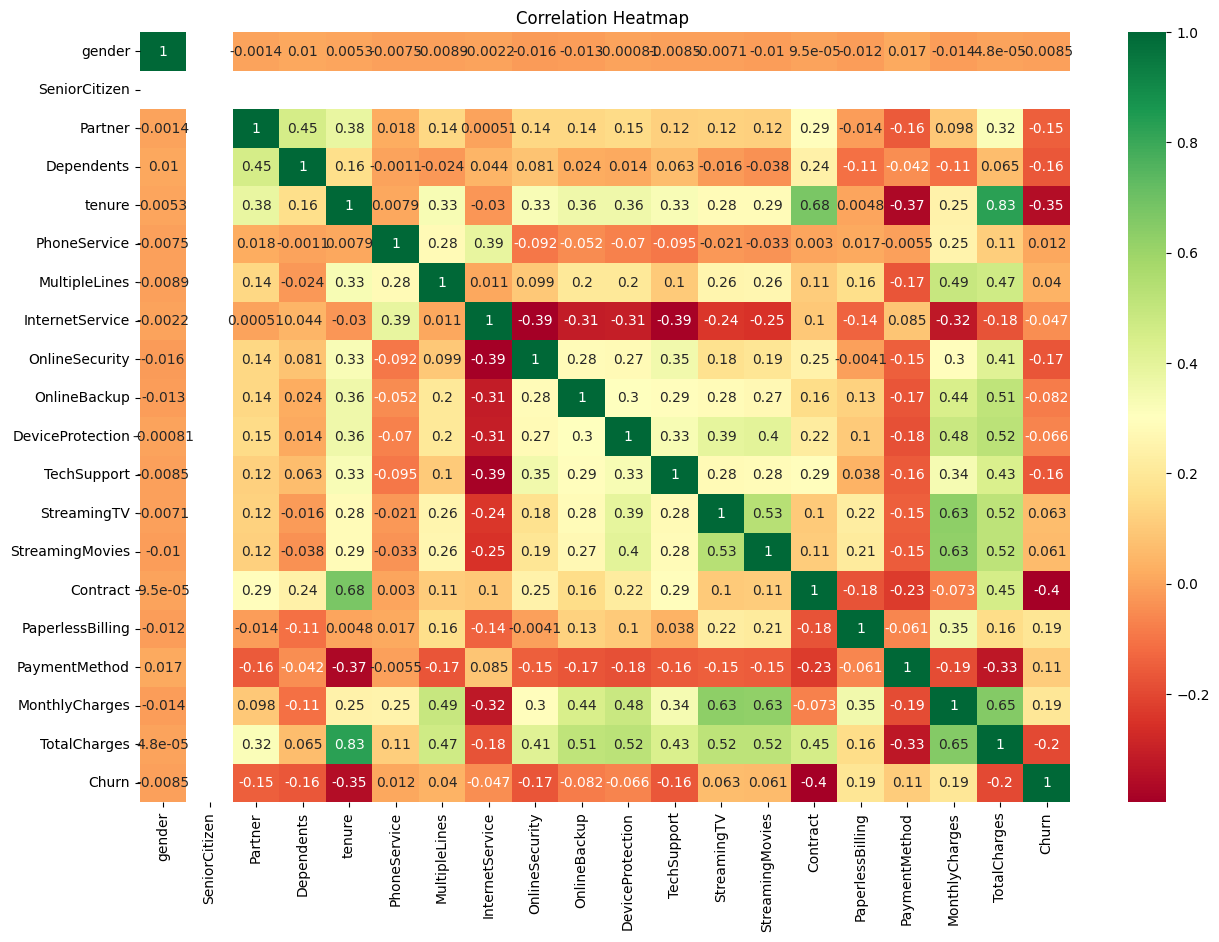

In [395]:
correlation_matrix = churn.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap ")
plt.show()

# Test Train split

In [396]:
from sklearn.model_selection import train_test_split
X=churn.drop(columns=['Churn'])
y=churn['Churn']

In [397]:
print(X.shape,y.shape)

(7032, 19) (7032,)


In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [399]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4711, 19) (2321, 19) (4711,) (2321,)


# Standard Scaler

In [400]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [401]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [402]:
X_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(X_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']])

X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5767,-1.025587,0.0,1.036981,-0.651578,1.325456,0.331325,-0.844816,-1.182026,-0.636404,-0.731114,-0.725312,1.569704,1.260906,-0.802701,1.563215,0.827955,-0.554499,-0.161316,0.679395
5361,-1.025587,0.0,-0.964337,1.534736,-1.152524,0.331325,-0.844816,1.522454,-0.636404,-0.731114,-0.725312,-0.637063,-0.793080,-0.802701,0.365183,0.827955,1.339119,-1.469930,-0.967341
5745,-1.025587,0.0,1.036981,1.534736,1.162966,0.331325,1.183690,1.522454,-0.636404,-0.731114,-0.725312,-0.637063,-0.793080,-0.802701,1.563215,0.827955,1.339119,-1.343719,-0.365667
6065,0.975051,0.0,-0.964337,-0.651578,1.081721,0.331325,1.183690,1.522454,-0.636404,-0.731114,-0.725312,-0.637063,-0.793080,-0.802701,1.563215,-1.207795,1.339119,-1.317148,-0.336787
229,-1.025587,0.0,1.036981,1.534736,0.594249,0.331325,1.183690,-1.182026,1.571328,1.367776,-0.725312,1.569704,1.260906,1.245795,1.563215,0.827955,-0.554499,0.685630,0.811653


In [403]:
X_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(X_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']])

X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1.023102,0.0,1.032853,-0.653781,1.167353,0.318695,1.144313,1.543349,-0.628356,-0.714202,-0.721092,-0.643725,-0.784328,-0.785045,1.598158,-1.203458,-1.420912,-1.334728,-0.353211
6784,-0.977420,0.0,-0.968192,-0.653781,-0.554401,0.318695,1.144313,1.543349,-0.628356,-0.714202,-0.721092,-0.643725,-0.784328,-0.785045,-0.814411,-1.203458,-1.420912,-1.344717,-0.808040
6125,1.023102,0.0,1.032853,-0.653781,-0.800366,0.318695,1.144313,0.178214,-0.628356,-0.714202,1.386785,-0.643725,1.274977,1.273813,-0.814411,0.830939,-0.503034,1.237500,-0.415888
3052,1.023102,0.0,1.032853,-0.653781,0.183493,0.318695,1.144313,-1.186920,1.591454,-0.714202,-0.721092,-0.643725,-0.784328,-0.785045,-0.814411,0.830939,1.332723,-0.334139,-0.120945
4099,-0.977420,0.0,-0.968192,-0.653781,-1.087326,-3.137801,-0.873887,-1.186920,1.591454,-0.714202,-0.721092,-0.643725,-0.784328,-0.785045,-0.814411,-1.203458,-1.420912,-1.186554,-0.941691


Summary of the dataset using the model

In [404]:
import statsmodels.api as sm

In [405]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4711
Model:                            GLM   Df Residuals:                     4692
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1956.8
Date:                Mon, 10 Jun 2024   Deviance:                       3913.6
Time:                        12:59:35   Pearson chi2:                 5.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2813
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7609      0.067    -26.168      0.000      -1.893      -1.629
gender              -0.0136      0.039     -0.346      0.730      -0.091       0.064
SeniorCitizen     1.007e-15    6.3e-17     15.988      0.000    8.83e-16    1.13e-15
Partner              0.0802      0.047      1.702      0.089      -0.012       0.172
Dependents          -0.1423      0.050     -2.859      0.004      -0.240      -0.045
tenure              -1.4830      0.190     -7.801      0.000      -1.856      -1.110
PhoneService        -0.3694      0.054     -6.825      0.000      -0.475      -0.263
MultipleLines        0.0353      0.049      0.718      0.473      -0.061       0.132
InternetService     -0.0013      0.058     -0.023      0.982      -0.116       0.113
OnlineSecurity      -0.2798      0.047     -5.948      0.000      -0.372      -0.188
OnlineBackup        -0.1291      0.046     -2.823      0.005      -0.219      -0.039
DeviceProtection    -0.0987      0.047     -2.114      0.035      -0.190      -0.007
TechSupport         -0.2509      0.048     -5.261      0.000      -0.344      -0.157
StreamingTV         -0.0442      0.051     -0.865      0.387      -0.144       0.056
StreamingMovies     -0.0471      0.051     -0.916      0.360      -0.148       0.054
Contract            -0.6726      0.080     -8.383      0.000      -0.830      -0.515
PaperlessBilling     0.1297      0.044      2.939      0.003       0.043       0.216
PaymentMethod        0.0440      0.046      0.958      0.338      -0.046       0.134
MonthlyCharges       1.0081      0.094     10.704      0.000       0.824       1.193
TotalCharges         0.7341      0.197      3.718      0.000       0.347       1.121
====================================================================================
"""

# Feature Engineering

# Variance Inflation Factor

In [406]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [407]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
18,TotalCharges,10.40
4,tenure,7.28
17,MonthlyCharges,6.32
14,Contract,2.51
7,InternetService,1.98
13,StreamingMovies,1.94
12,StreamingTV,1.93
5,PhoneService,1.73
10,DeviceProtection,1.58
11,TechSupport,1.54


In [408]:
X_train=X_train.drop(columns=['TotalCharges'])
X_train.shape

(4711, 18)

In [409]:
X_test=X_test.drop(columns=['TotalCharges'])
X_test.shape

(2321, 18)

In [410]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
17,MonthlyCharges,5.04
4,tenure,2.78
14,Contract,2.50
7,InternetService,1.95
13,StreamingMovies,1.92
12,StreamingTV,1.92
5,PhoneService,1.72
10,DeviceProtection,1.55
6,MultipleLines,1.52
11,TechSupport,1.51


In [411]:
X_train=X_train.drop(columns=['SeniorCitizen'])
X_train.shape

(4711, 17)

In [412]:
X_test=X_test.drop(columns=['SeniorCitizen'])
X_test.shape

(2321, 17)

In [413]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,MonthlyCharges,5.04
3,tenure,2.78
13,Contract,2.50
6,InternetService,1.95
12,StreamingMovies,1.92
11,StreamingTV,1.92
4,PhoneService,1.72
9,DeviceProtection,1.55
5,MultipleLines,1.52
10,TechSupport,1.51


# Random over sampling for making the data balanced

In [414]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler to the training data
ros = RandomOverSampler(sampling_strategy=1, random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [415]:
print(X_train.shape,y_train.shape)

(6904, 17) (6904,)


# Model selection

# Logistic Regression

In [416]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [417]:
from sklearn.metrics import accuracy_score
y_train_pred_lr=lr.predict(X_train)
y_test_pred_lr=lr.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_lr,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_lr,y_test))

training accuracy: 0.7646292004634995
testing accuracy: 0.7414907367514002


In [418]:
print(classification_report(y_test_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80      1359
           1       0.80      0.51      0.62       962

    accuracy                           0.74      2321
   macro avg       0.76      0.71      0.71      2321
weighted avg       0.75      0.74      0.73      2321



# SVM

In [419]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [420]:
y_train_pred_svm=svc.predict(X_train)
y_test_pred_svm=svc.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_svm,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_svm,y_test))

training accuracy: 0.8173522595596755
testing accuracy: 0.7389056441189142


In [421]:
print(classification_report(y_test_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.73      0.89      0.81      1405
           1       0.75      0.50      0.60       916

    accuracy                           0.74      2321
   macro avg       0.74      0.70      0.70      2321
weighted avg       0.74      0.74      0.73      2321



In [422]:
svc1=SVC(kernel='poly')
svc1.fit(X_train,y_train)

SVC(kernel='poly')

In [423]:
y_train_pred_svm1=svc1.predict(X_train)
y_test_pred_svm1=svc1.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_svm1,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_svm1,y_test))

training accuracy: 0.8128621089223639
testing accuracy: 0.7320120637656182


In [424]:
print(classification_report(y_test_pred_svm1,y_test))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1363
           1       0.78      0.49      0.60       958

    accuracy                           0.73      2321
   macro avg       0.75      0.70      0.70      2321
weighted avg       0.74      0.73      0.72      2321



In [425]:
svc2=SVC(kernel='rbf')
svc2.fit(X_train,y_train)

SVC()

In [426]:
y_train_pred_svm2=svc2.predict(X_train)
y_test_pred_svm2=svc2.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_svm2,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_svm2,y_test))

training accuracy: 0.8173522595596755
testing accuracy: 0.7389056441189142


In [427]:
print(classification_report(y_test_pred_svm2,y_test))

              precision    recall  f1-score   support

           0       0.73      0.89      0.81      1405
           1       0.75      0.50      0.60       916

    accuracy                           0.74      2321
   macro avg       0.74      0.70      0.70      2321
weighted avg       0.74      0.74      0.73      2321



# Decision tree

In [428]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=3,           # Limit the depth of the tree
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,    # Minimum number of samples required to be at a leaf node
    random_state=42)        #default it is gini
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [429]:
y_train_pred_dt=dt1.predict(X_train)
y_test_pred_dt=dt1.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_dt,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_dt,y_test))

training accuracy: 0.7618771726535342
testing accuracy: 0.7212408444635933


In [430]:
print(classification_report(y_test_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1356
           1       0.76      0.48      0.59       965

    accuracy                           0.72      2321
   macro avg       0.73      0.69      0.69      2321
weighted avg       0.73      0.72      0.71      2321



In [431]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier(criterion='entropy',
        max_depth=3,           # Limit the depth of the tree
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,    # Minimum number of samples required to be at a leaf node
    random_state=42)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [432]:
y_train_pred_dt1=dt2.predict(X_train)
y_test_pred_dt1=dt2.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_dt1,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_dt1,y_test))

training accuracy: 0.7618771726535342
testing accuracy: 0.7212408444635933


In [433]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5, 10],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [2,5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.2f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Training Accuracy: 0.87
Testing Accuracy: 0.71


In [434]:
print(classification_report(y_test_pred_dt1,y_test))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1356
           1       0.76      0.48      0.59       965

    accuracy                           0.72      2321
   macro avg       0.73      0.69      0.69      2321
weighted avg       0.73      0.72      0.71      2321



## Naive Bayes

In [435]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [436]:
y_train_pred_nb=nb.predict(X_train)
y_test_pred_nb=nb.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_nb,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_nb,y_test))

training accuracy: 0.7570973348783314
testing accuracy: 0.7134855665661353


In [437]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

gnb = GaussianNB()

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'var_smoothing': 1e-09}
Training Accuracy: 0.76
Testing Accuracy: 0.71


In [438]:
print(classification_report(y_test_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.68      0.91      0.78      1274
           1       0.81      0.47      0.60      1047

    accuracy                           0.71      2321
   macro avg       0.75      0.69      0.69      2321
weighted avg       0.74      0.71      0.70      2321



# Random Forest

In [439]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200,      # Number of trees in the forest
    max_depth=5,           # Limit the depth of each tree
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,    # Minimum number of samples required to be at a leaf node
    random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [440]:
y_train_pred_rfc=rfc.predict(X_train)
y_test_pred_rfc=rfc.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_rfc,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_rfc,y_test))

training accuracy: 0.781720741599073
testing accuracy: 0.7311503662214562


In [441]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5,10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,5]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_

train_accuracy_rf = accuracy_score(y_train, best_rf_model.predict(X_train))
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Training Accuracy:", train_accuracy_rf)

test_accuracy_rf = accuracy_score(y_test, best_rf_model.predict(X_test))
print("Random Forest Test Accuracy:", test_accuracy_rf)


Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Training Accuracy: 0.9984067207415991
Random Forest Test Accuracy: 0.7651874192158552


In [442]:
print(classification_report(y_test_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79      1303
           1       0.82      0.49      0.62      1018

    accuracy                           0.73      2321
   macro avg       0.76      0.71      0.70      2321
weighted avg       0.75      0.73      0.72      2321



# Ada boost classifier

In [443]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [444]:
y_train_pred_abc=abc.predict(X_train)
y_test_pred_abc=abc.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_abc,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_abc,y_test))

training accuracy: 0.7788238702201622
testing accuracy: 0.7324429125376992


In [445]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

ada_grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), ada_param_grid, cv=5, scoring='accuracy')
ada_grid_search.fit(X_train, y_train)

best_ada_model = ada_grid_search.best_estimator_

train_accuracy_ada = accuracy_score(y_train, best_ada_model.predict(X_train))
print("AdaBoost Best Parameters:", ada_grid_search.best_params_)
print("AdaBoost Training Accuracy:", train_accuracy_ada)

test_accuracy_ada = accuracy_score(y_test, best_ada_model.predict(X_test))
print("AdaBoost Test Accuracy:", test_accuracy_ada)


AdaBoost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
AdaBoost Training Accuracy: 0.7888180764774044
AdaBoost Test Accuracy: 0.7367514002585093


In [446]:
print(classification_report(y_test_pred_abc,y_test))

              precision    recall  f1-score   support

           0       0.70      0.91      0.80      1322
           1       0.81      0.49      0.61       999

    accuracy                           0.73      2321
   macro avg       0.76      0.70      0.70      2321
weighted avg       0.75      0.73      0.72      2321



# Gradient boosting classifier

In [447]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [448]:
y_train_pred_gbc=gbc.predict(X_train)
y_test_pred_gbc=gbc.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_gbc,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_gbc,y_test))

training accuracy: 0.8046060254924682
testing accuracy: 0.7345971563981043


In [449]:
print(classification_report(y_test_pred_gbc,y_test))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1357
           1       0.79      0.50      0.61       964

    accuracy                           0.73      2321
   macro avg       0.75      0.70      0.70      2321
weighted avg       0.75      0.73      0.72      2321



In [450]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

best_gb_model = gb_grid_search.best_estimator_

train_accuracy_gb = accuracy_score(y_train, best_gb_model.predict(X_train))
print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)
print("Gradient Boosting Training Accuracy:", train_accuracy_gb)

test_accuracy_gb = accuracy_score(y_test, best_gb_model.predict(X_test))
print("Gradient Boosting Test Accuracy:", test_accuracy_gb)


Gradient Boosting Best Parameters: {'learning_rate': 1.0, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Gradient Boosting Training Accuracy: 0.9984067207415991
Gradient Boosting Test Accuracy: 0.7475226195605342


# Merics beyond accuracy

In [451]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [452]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test,y_test_pred_lr)
print(confusion)

[[1235  476]
 [ 124  486]]


In [453]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

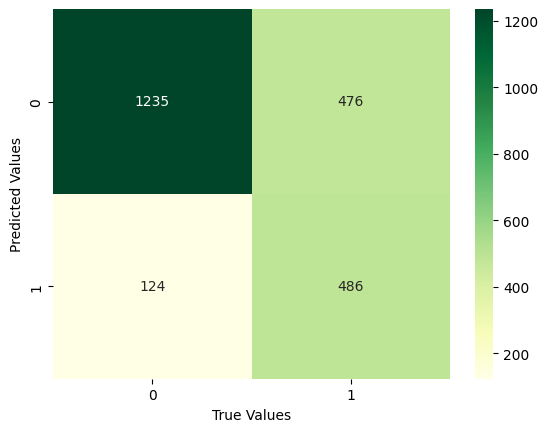

In [454]:
sns.heatmap((confusion_matrix(y_test,y_test_pred_lr)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [455]:
print(classification_report(y_test_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80      1359
           1       0.80      0.51      0.62       962

    accuracy                           0.74      2321
   macro avg       0.76      0.71      0.71      2321
weighted avg       0.75      0.74      0.73      2321



In [456]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

test_precision = precision_score(y_test_pred_lr,y_test)
test_recall = recall_score(y_test_pred_lr,y_test)
test_f1 = f1_score(y_test_pred_lr,y_test)
test_accuracy = accuracy_score(y_test, y_test_pred_lr)

print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Precision: 0.80
Test Recall: 0.51
Test F1 Score: 0.62
Test Accuracy: 0.74


# ROC curve

In [457]:
from sklearn.metrics import roc_curve, roc_auc_score

In [458]:
y_train_prob = lr.predict_proba(X_train)[:, 1]
y_test_prob = lr.predict_proba(X_test)[:, 1]

In [459]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

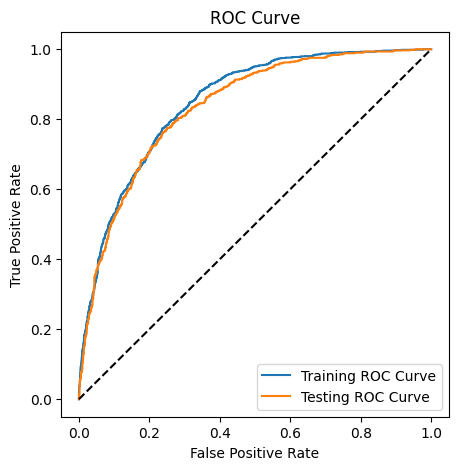

In [460]:
plt.figure(figsize=(5, 5))
plt.plot(fpr_train, tpr_train, label='Training ROC Curve')
plt.plot(fpr_test, tpr_test, label='Testing ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [461]:
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)
print("Training AUC Score:", auc_train)
print("Testing AUC Score:", auc_test)


Training AUC Score: 0.8483614969876565
Testing AUC Score: 0.8363439077904782
